<a href="https://colab.research.google.com/github/MOHAMEDARSHAD005/PlayStoreDataMining/blob/main/dataminingplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraies used for Data Mining



In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Classification & Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans

# Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules

# Network Graphs
import networkx as nx

# Other Utilities
import warnings
warnings.filterwarnings('ignore')


# 1. Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


# Dataset Preview
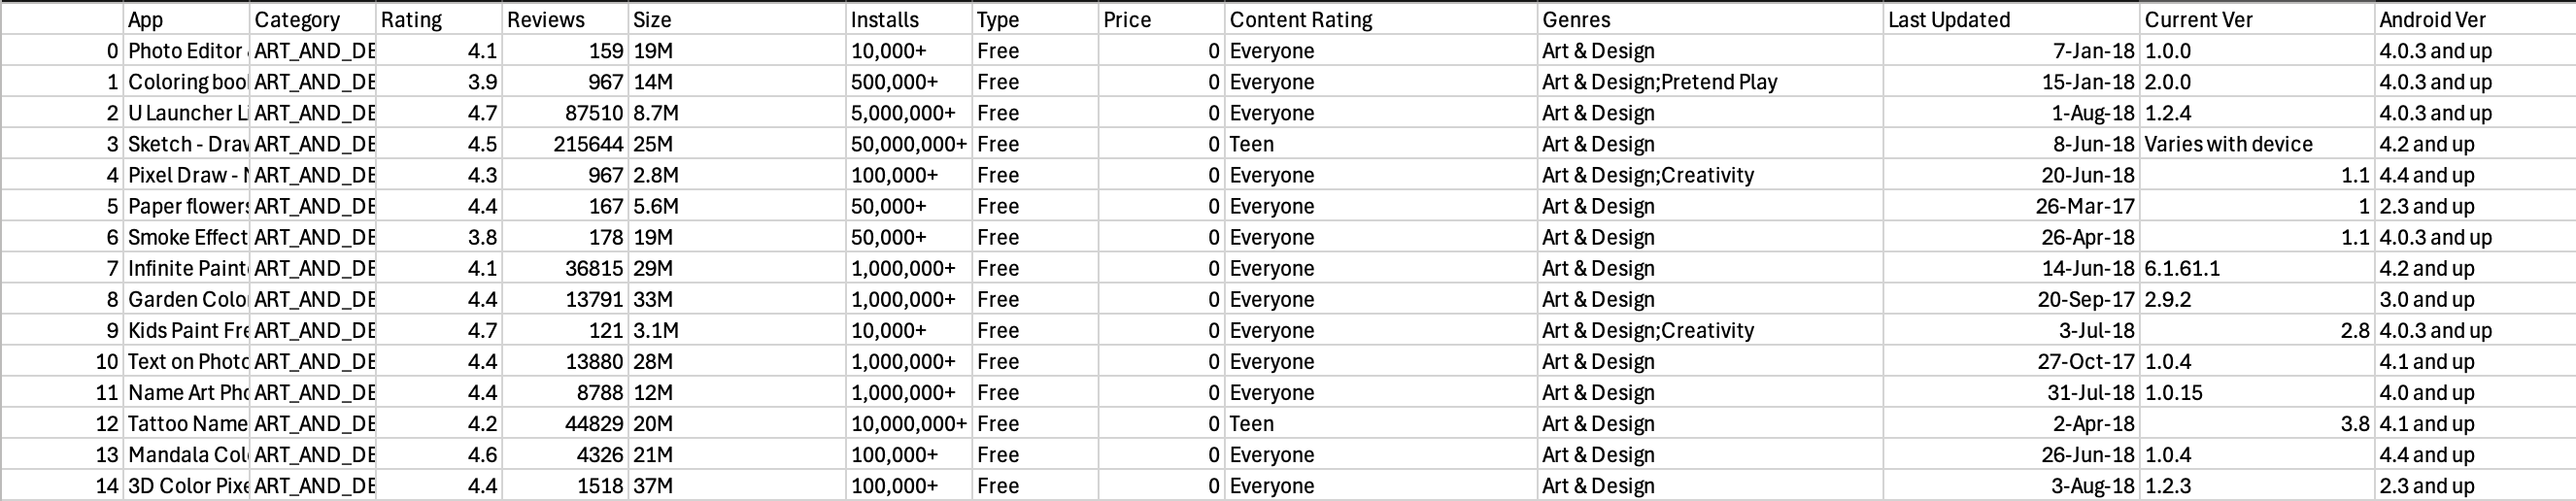

# 2. Data Preprocessing


In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head()

df = df.drop_duplicates()
df = df.dropna(subset=['Rating', 'Type', 'Price', 'Content Rating', 'Category', 'Installs', 'Size', 'Reviews'])


df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)


df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)


def convert_size(size):
    if size[-1] == 'M':
        return float(size[:-1])
    elif size[-1] == 'k':
        return float(size[:-1]) / 1024
    else:
        return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].dropna().apply(convert_size)
df['Size'].fillna(df['Size'].mean(), inplace=True)


df['Reviews'] = df['Reviews'].astype(int)


df = df[(df['Rating'] >= 1.0) & (df['Rating'] <= 5.0)]


df['Install_Class'] = pd.qcut(df['Installs'], q=3, labels=['Low', 'Medium', 'High'])


df_cleaned = df.reset_index(drop=True)

df_cleaned.head()

Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free    0.0   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free    0.0   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free    0.0   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free    0.0   
4  ART_AND_DESIGN     4.3      967   2.8    100000  Free    0.0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art & Design;Pretend Play    15-Jan-18               2.0.0   
2       Everyone               Art & Design     1-Aug-18               1.2.4   
3           Teen               Art & Design     8-Jun-18  Varies with device   
4       Everyone    Art & Design;Creativity    20-Jun-18                 1.1   

    Android Ver Install_Class  
0  4.0.3 and up           Low  
1  4.0.3 and up        Medium  
2  4.0.3 and up          High  
3    4.2 and up          High  
4    4.4 and up        Medium

# Data Distribution Visualization

# 1. Distribution of App Ratings

Text(0, 0.5, 'Frequency')

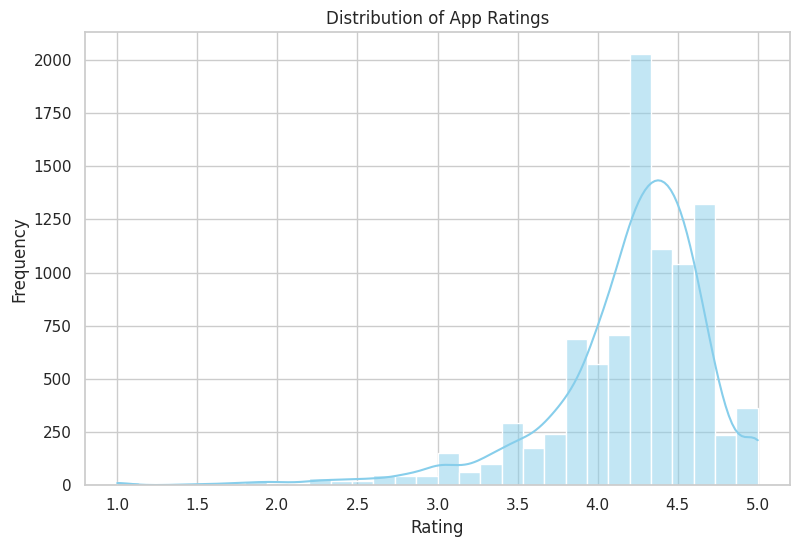

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.histplot(df_cleaned['Rating'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#  2. Distribution of Reviews (log scale for clarity)

Text(0, 0.5, 'Log Frequency')

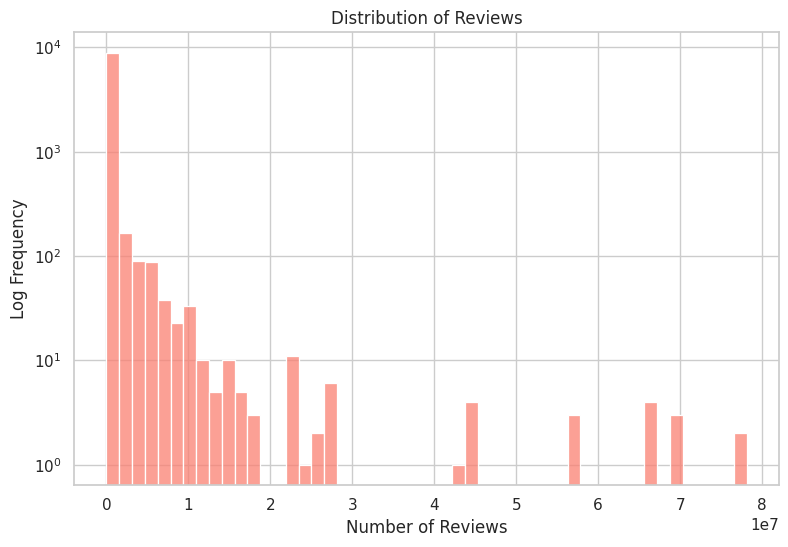

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 2)
sns.histplot(df_cleaned['Reviews'], bins=50, color='salmon')
plt.yscale('log')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Frequency')

# 3. Distribution of App Size

Text(0, 0.5, 'Frequency')

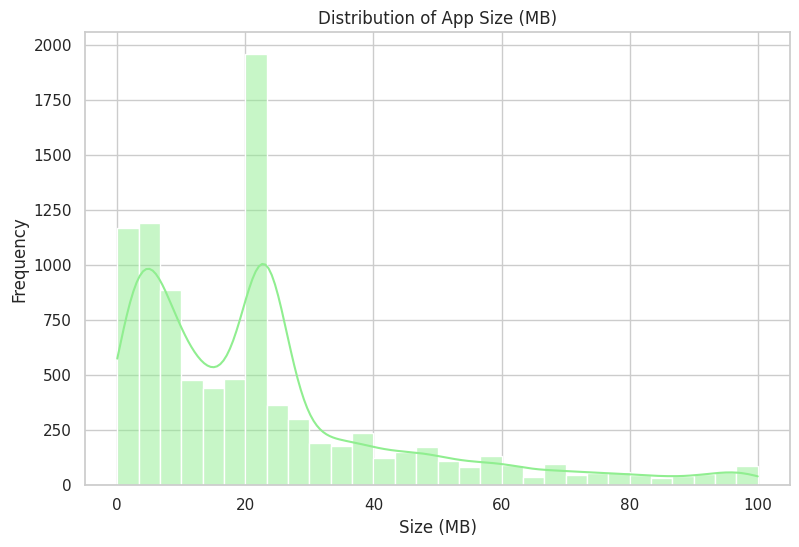

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 3)
sns.histplot(df_cleaned['Size'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of App Size (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')

# 4. Distribution of Price

Text(0, 0.5, 'Frequency')

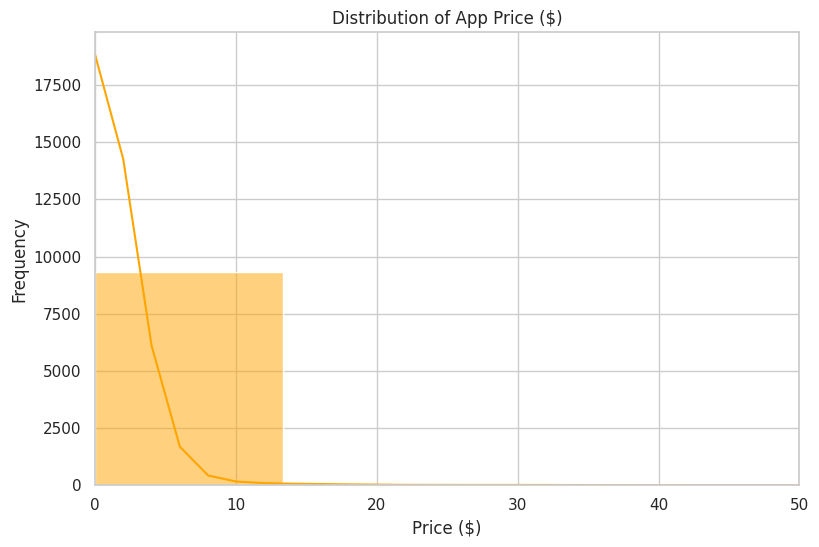

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 4)
sns.histplot(df_cleaned['Price'], kde=True, bins=30, color='orange')
plt.xlim(0, 50)  # Zoom in to most relevant range
plt.title('Distribution of App Price ($)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# 5. Count of Install Classes

Text(0, 0.5, 'Count')

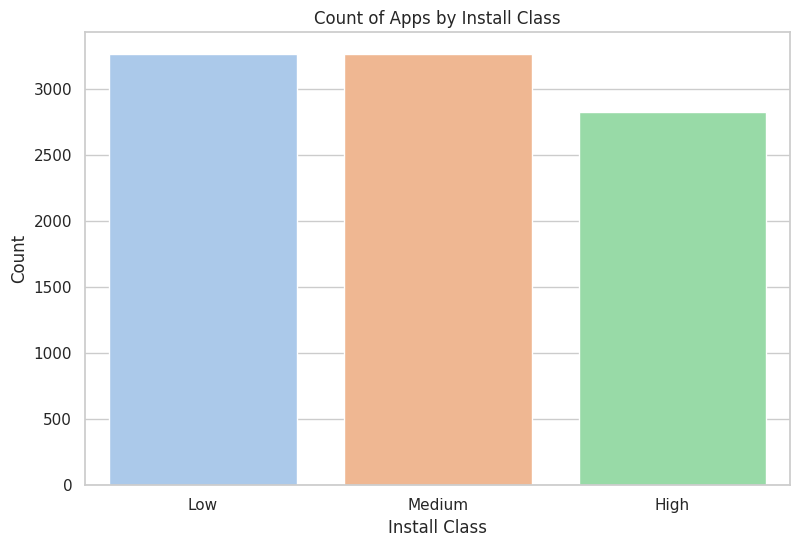

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 5)
sns.countplot(data=df_cleaned, x='Install_Class', palette='pastel')
plt.title('Count of Apps by Install Class')
plt.xlabel('Install Class')
plt.ylabel('Count')

# 6. Top 10 App Categories



Text(0, 0.5, 'Category')

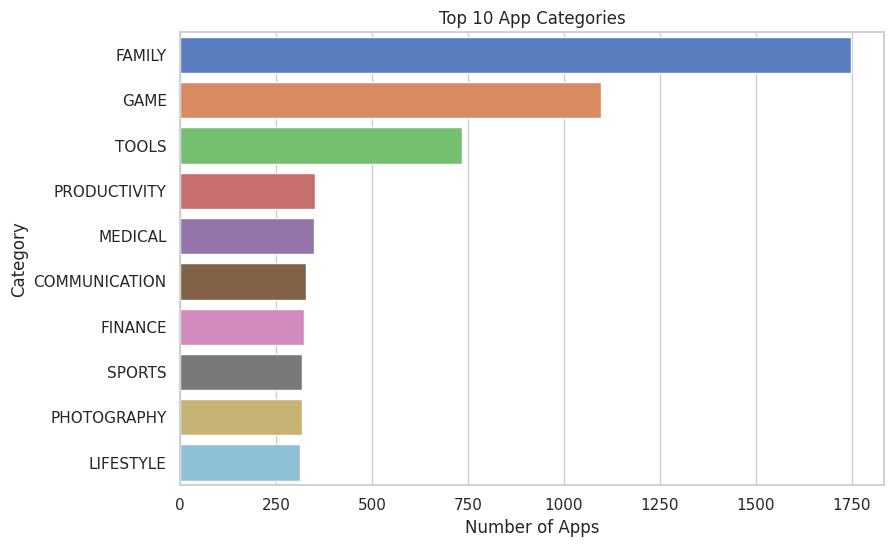

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 6)
top_categories = df_cleaned['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='muted')
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

#Advanced EDA

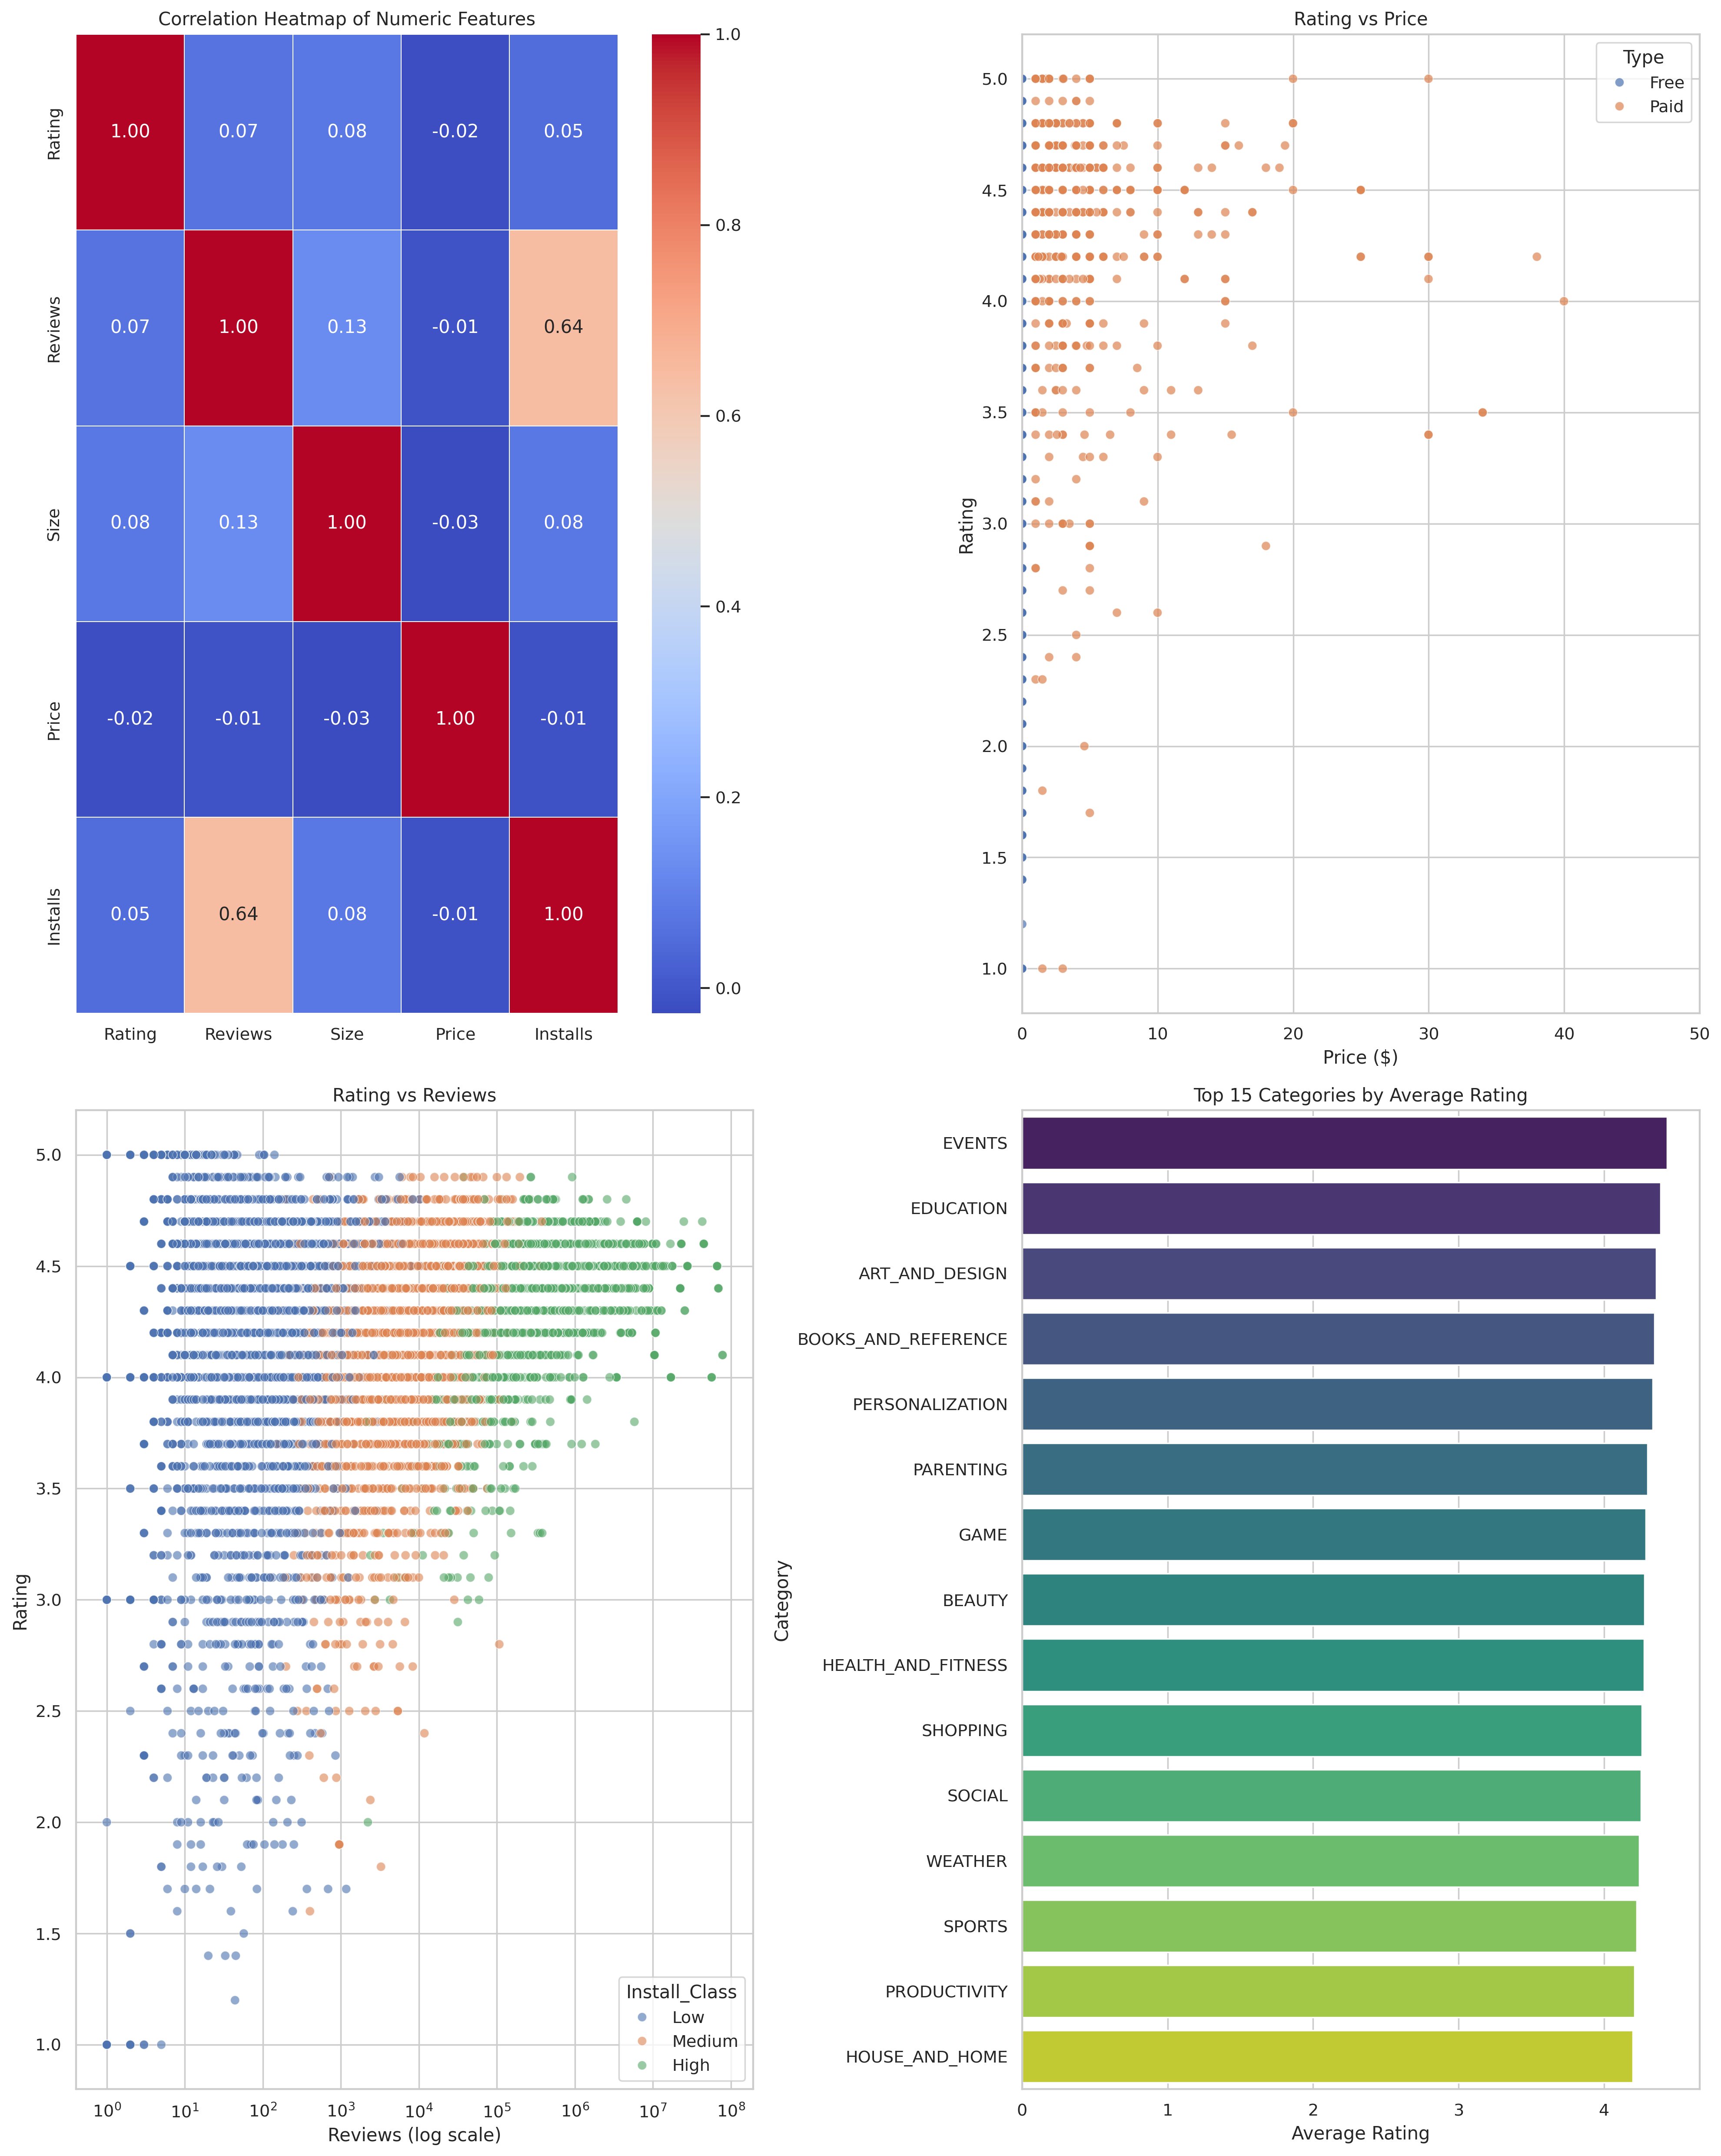

In [ ]:
# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 20),dpi= 250)

# ---------- 1. Correlation Heatmap ----------
plt.subplot(2, 2, 1)

numeric_features = ['Rating', 'Reviews', 'Size', 'Price', 'Installs']
correlation = df_cleaned[numeric_features].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')


# ---------- 2. Rating vs Price ----------
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_cleaned, x='Price', y='Rating', hue='Type', alpha=0.7)
plt.title('Rating vs Price')
plt.xlim(0, 50)  # Limit to common range
plt.xlabel('Price ($)')
plt.ylabel('Rating')


# ---------- 3. Rating vs Reviews ----------
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_cleaned, x='Reviews', y='Rating', hue='Install_Class', alpha=0.6)
plt.xscale('log')
plt.title('Rating vs Reviews')
plt.xlabel('Reviews (log scale)')
plt.ylabel('Rating')


# ---------- 4. Average Rating by Category ----------
plt.subplot(2, 2, 4)
avg_rating = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title('Top 15 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')



plt.tight_layout()
plt.show()

# 3.Classification
Method : Decision Tree

Accuracy: 0.8799359658484525

Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.88      0.89       569
         Low       0.93      0.91      0.92       661
      Medium       0.81      0.84      0.83       644

    accuracy                           0.88      1874
   macro avg       0.88      0.88      0.88      1874
weighted avg       0.88      0.88      0.88      1874



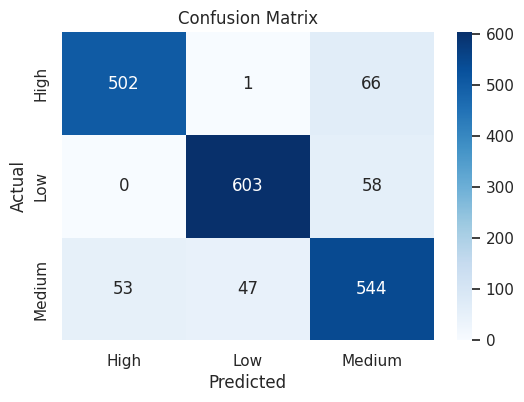

In [ ]:
# Select Features and Target
features = ['Rating', 'Reviews', 'Size', 'Price', 'Type', 'Content Rating']
target = 'Install_Class'

df_model = df_cleaned[features + [target]].copy()

# Encode Categorical Variables
label_encoders = {}
for col in ['Type', 'Content Rating']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

#  Step 3: Split Data
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predictions and Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



#Visualization decision Tree

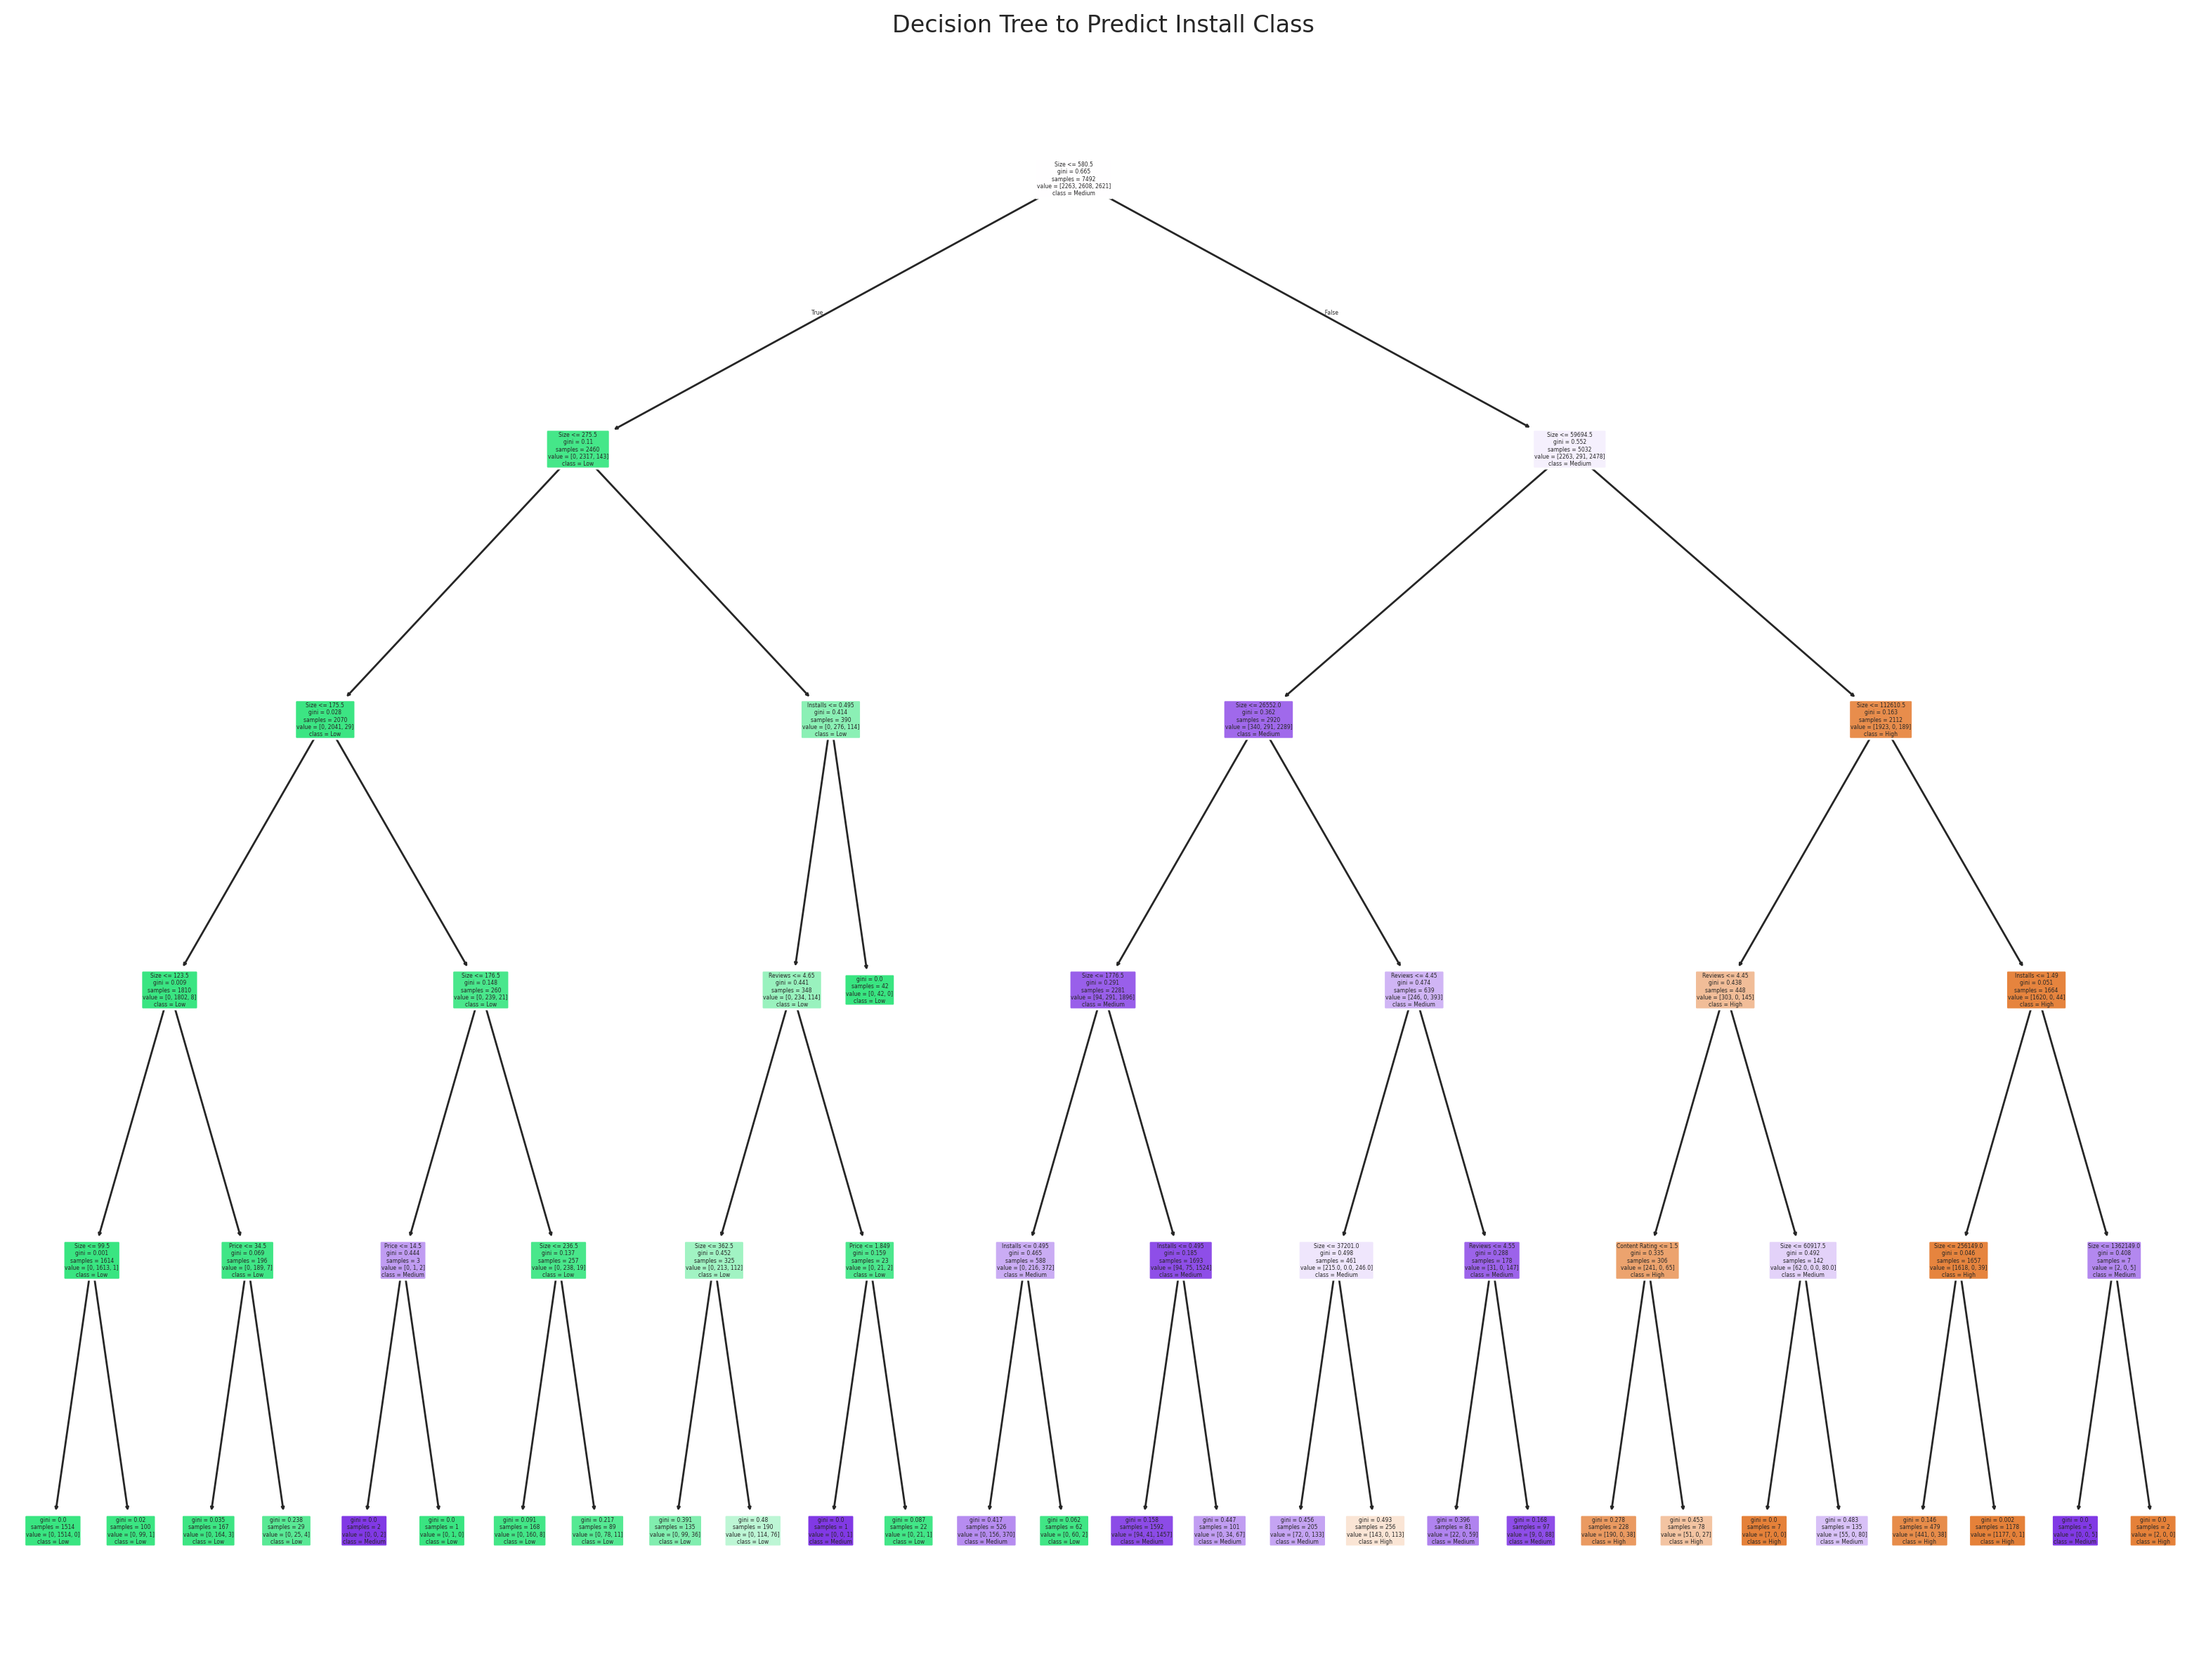

In [ ]:

plt.figure(figsize=(20, 15),dpi=200)
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree to Predict Install Class")
plt.show()

# 4. Clustering
Method : K means



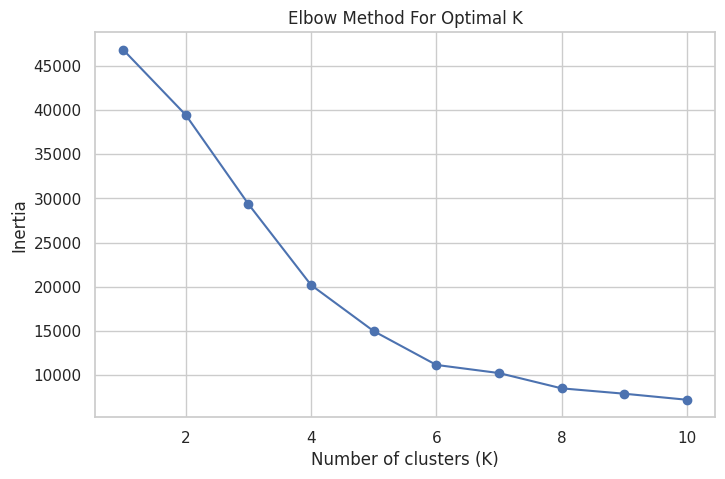

In [ ]:
# Select numeric features
cluster_features = ['Rating', 'Reviews', 'Size', 'Price', 'Installs']
df_cluster = df_cleaned[cluster_features].copy()

#  Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Step 3: Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 4: Fit KMeans with optimal K (let's choose K=3 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataframe
df_cleaned['Cluster'] = clusters

# Visualize Clusters (in 2D)

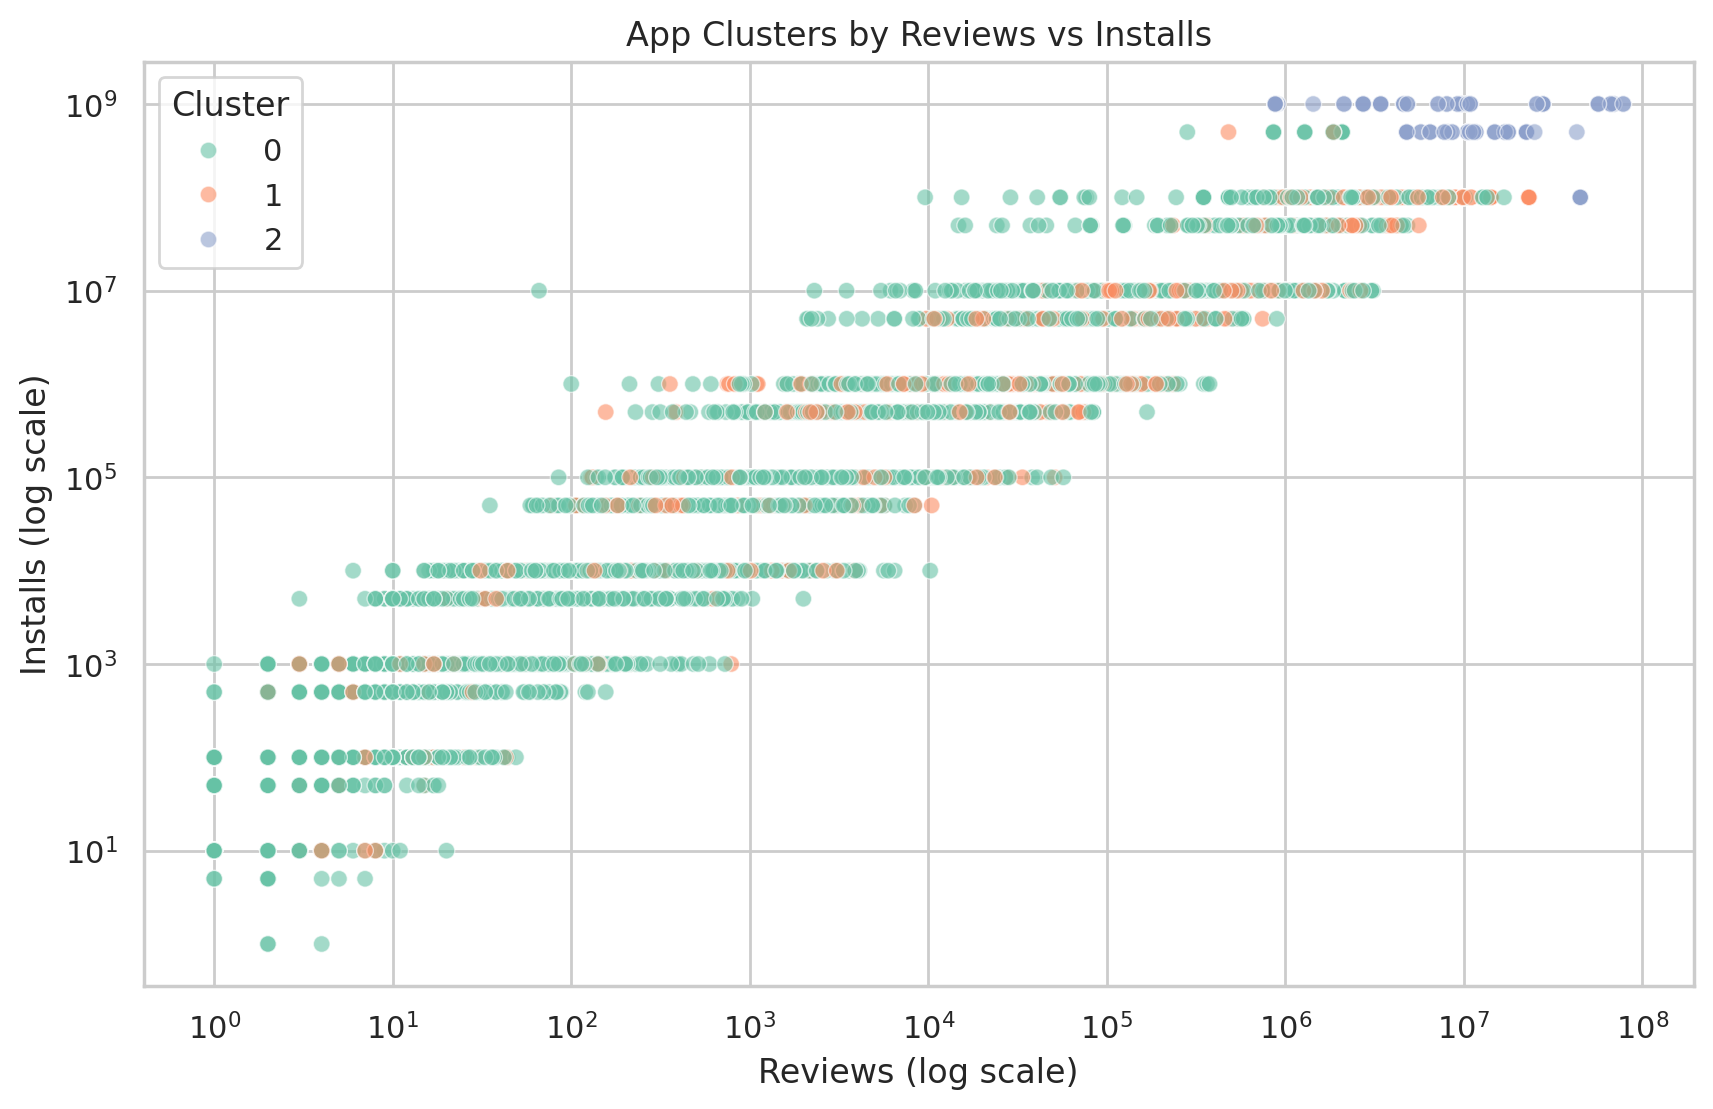

In [ ]:
plt.figure(figsize=(10, 6),dpi=200)
sns.scatterplot(data=df_cleaned, x='Reviews', y='Installs', hue='Cluster', palette='Set2', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('App Clusters by Reviews vs Installs')
plt.xlabel('Reviews (log scale)')
plt.ylabel('Installs (log scale)')
plt.legend(title='Cluster')
plt.show()

# 7.Association Rule Mining

In [ ]:
# Create bins for rating and price
df_arm = df_cleaned[['Category', 'Type', 'Content Rating', 'Rating', 'Price']].copy()
df_arm['Rating_Bin'] = pd.cut(df_arm['Rating'], bins=[0, 3.5, 4.0, 4.5, 5.0],
                               labels=['Low', 'Mid', 'High', 'Excellent'])
df_arm['Price_Bin'] = pd.cut(df_arm['Price'], bins=[-0.01, 0.01, 5, 1000],
                              labels=['Free', 'Cheap', 'Expensive'])

# One-hot encode for ARM
df_encoded = pd.get_dummies(df_arm[['Category', 'Type', 'Content Rating', 'Rating_Bin', 'Price_Bin']])

#  Frequent Itemsets using Apriori
frequent_items = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.1)
rules = rules.sort_values(by='lift', ascending=False)

#  Step 4: Show top 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents  \
445  (Content Rating_Everyone, Rating_Bin_High, Typ...   
450                                  (Price_Bin_Cheap)   
191               (Content Rating_Everyone, Type_Paid)   
192                                  (Price_Bin_Cheap)   
36                                   (Price_Bin_Cheap)   
193                                        (Type_Paid)   
190         (Content Rating_Everyone, Price_Bin_Cheap)   
444  (Content Rating_Everyone, Rating_Bin_High, Pri...   
194                 (Rating_Bin_High, Price_Bin_Cheap)   
37                                         (Type_Paid)   

                                           consequents   support  confidence  \
445                                  (Price_Bin_Cheap)  0.021034    0.807377   
450  (Content Rating_Everyone, Rating_Bin_High, Typ...  0.021034    0.388560   
191                                  (Price_Bin_Cheap)  0.046872    0.795290   
192               (Content Rating_Everyone, Type_Paid)  0.046872    0.865878   
36                                         (Type_Paid)  0.054132    1.000000   
193         (Content Rating_Everyone, Price_Bin_Cheap)  0.046872    0.678516   
190                                        (Type_Paid)  0.046872    1.000000   
444                                        (Type_Paid)  0.021034    1.000000   
194                                        (Type_Paid)  0.024664    1.000000   
37                                   (Price_Bin_Cheap)  0.054132    0.783617   

          lift  
445  14.914977  
450  14.914977  
191  14.691686  
192  14.691686  
36   14.476043  
193  14.476043  
190  14.476043  
444  14.476043  
194  14.476043  
37   14.476043

# Association Rule Visualization

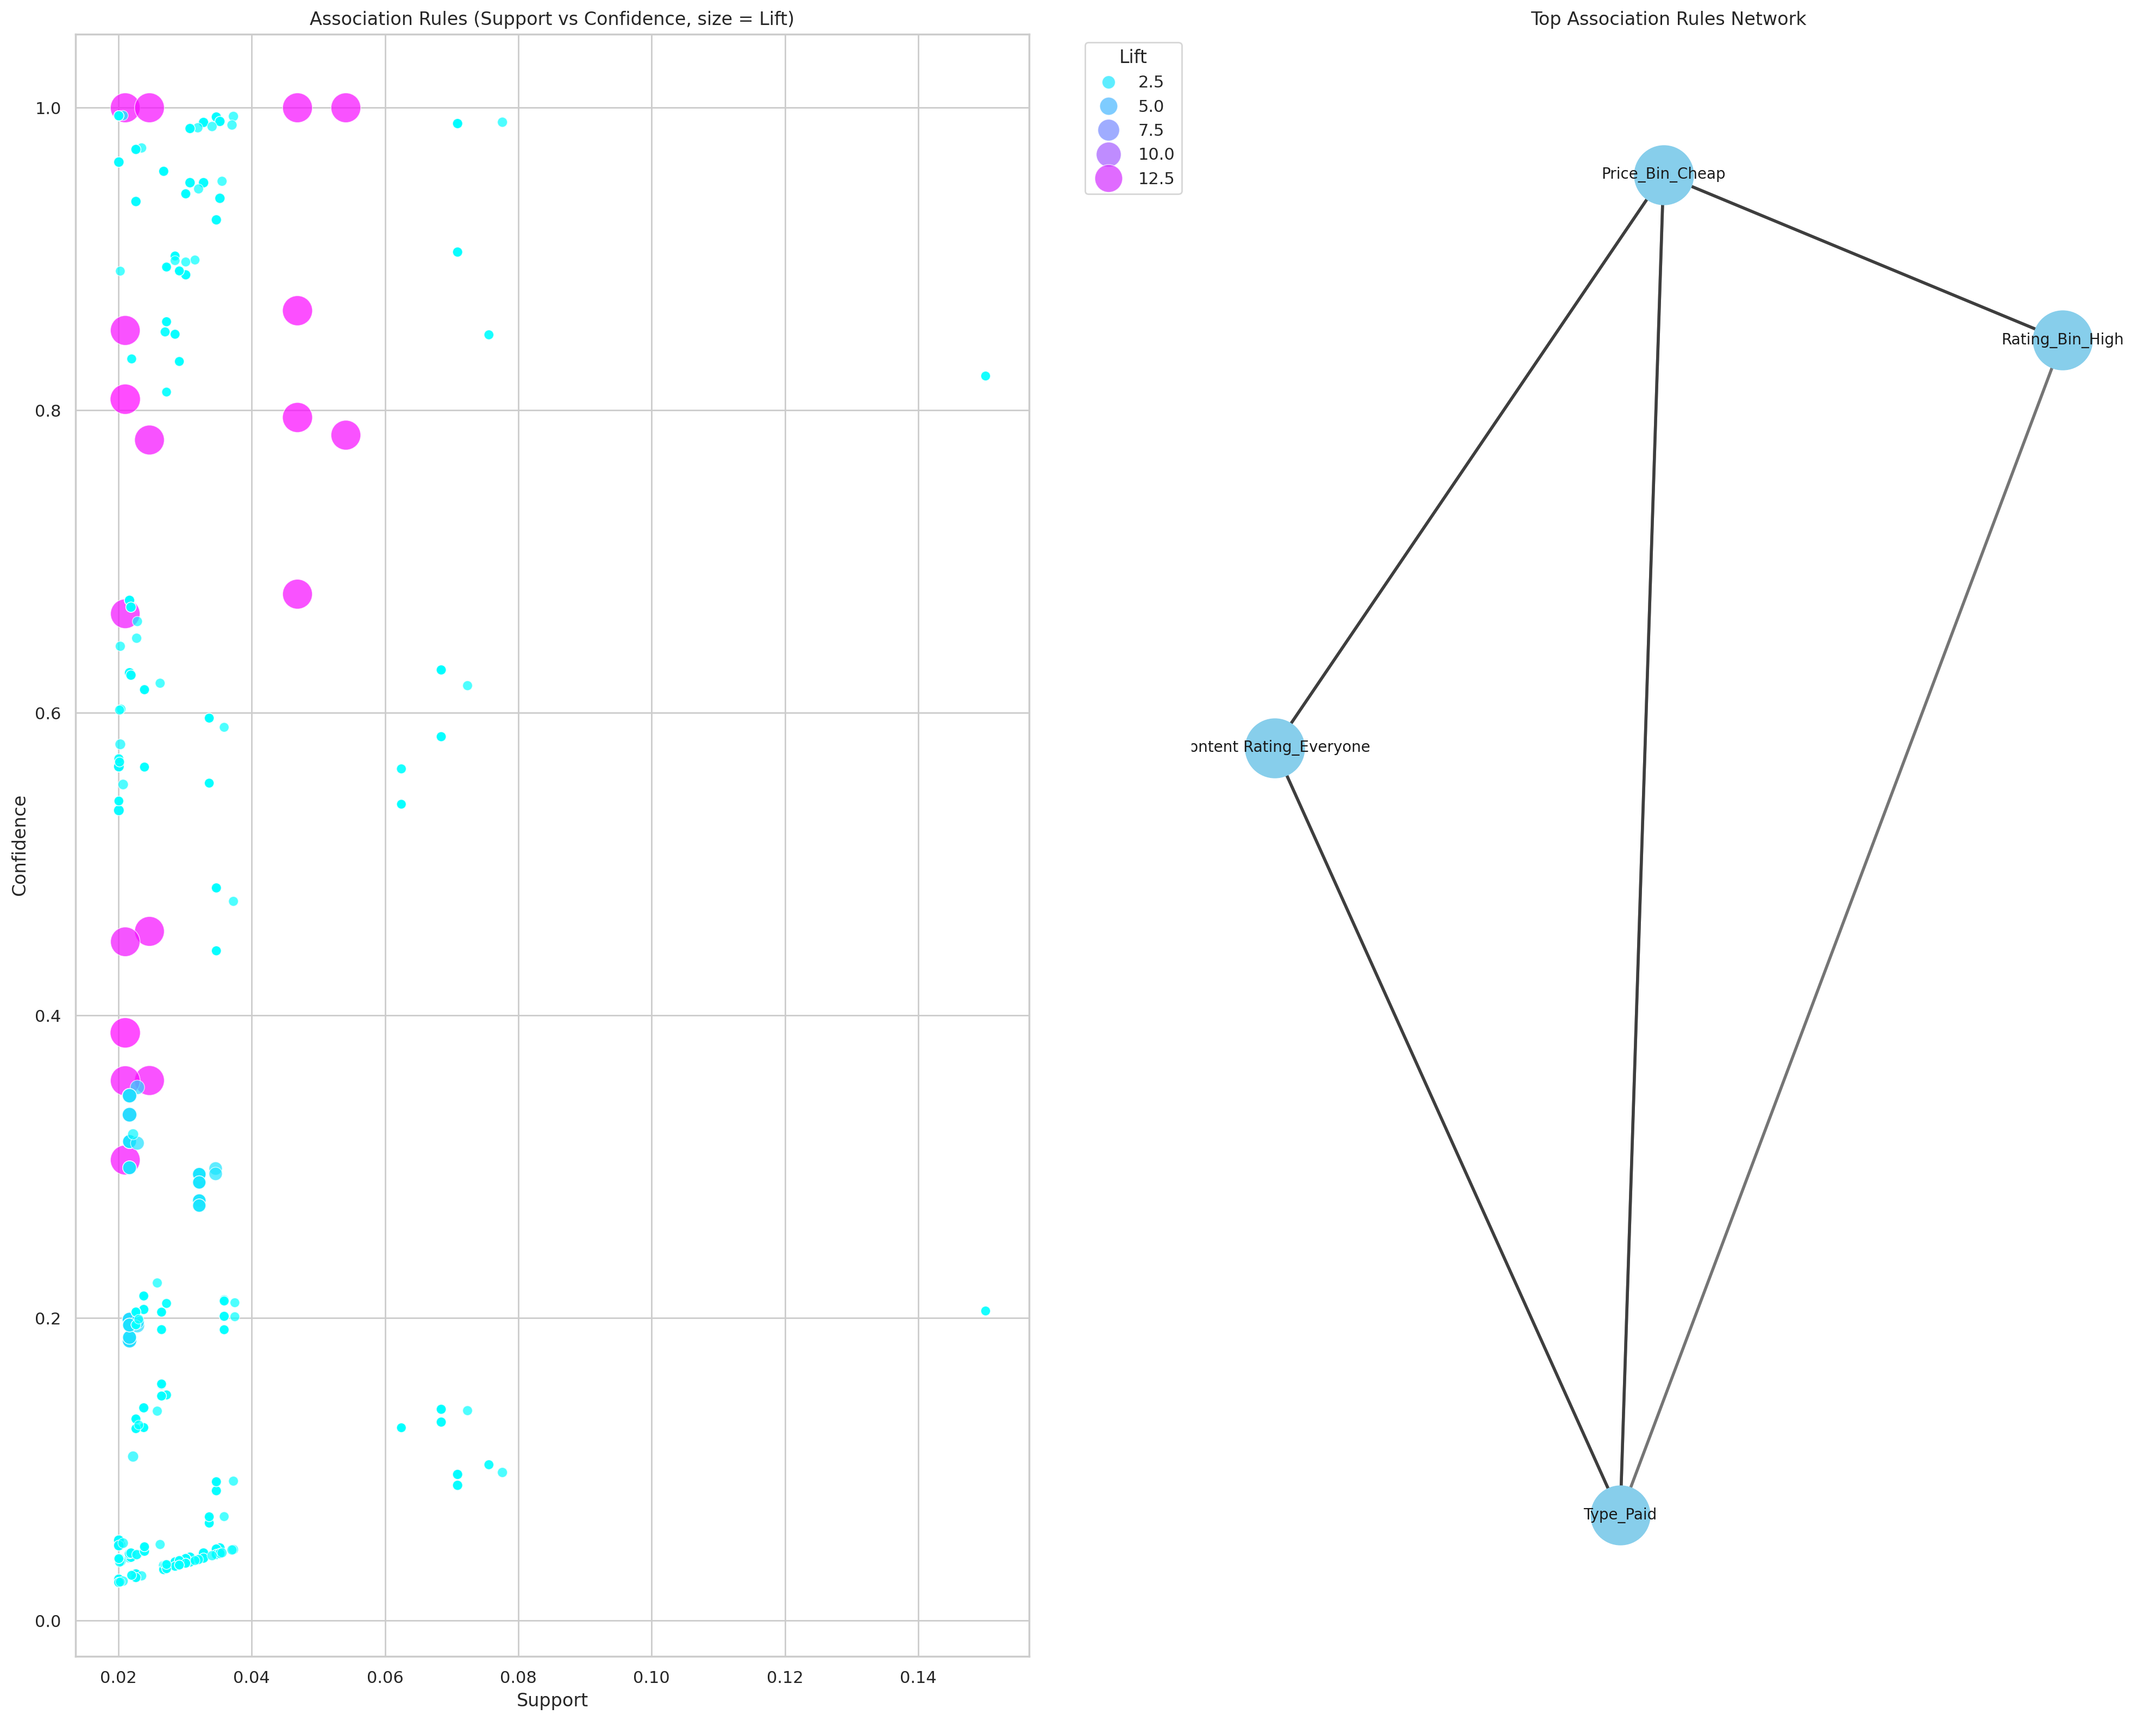

In [ ]:
# --- Scatter Plot of Association Rules ---
plt.figure(figsize=(20, 16),dpi =200)
plt.subplot(1,2,1)

sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", palette="cool", alpha=0.7, sizes=(40, 400))
plt.title("Association Rules (Support vs Confidence, size = Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# --- Network Graph of Top Rules ---
# Get top 10 rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(str(antecedent), str(consequent), weight=row['lift'])

# Plot the network
plt.subplot(1,2,2)

pos = nx.spring_layout(G, k=0.5, seed=42)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, arrows=True, arrowstyle='-|>')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Top Association Rules Network")
plt.axis('off')


plt.show()



#8. Regression

Mean Squared Error: 0.2451
R² Score: 0.0056


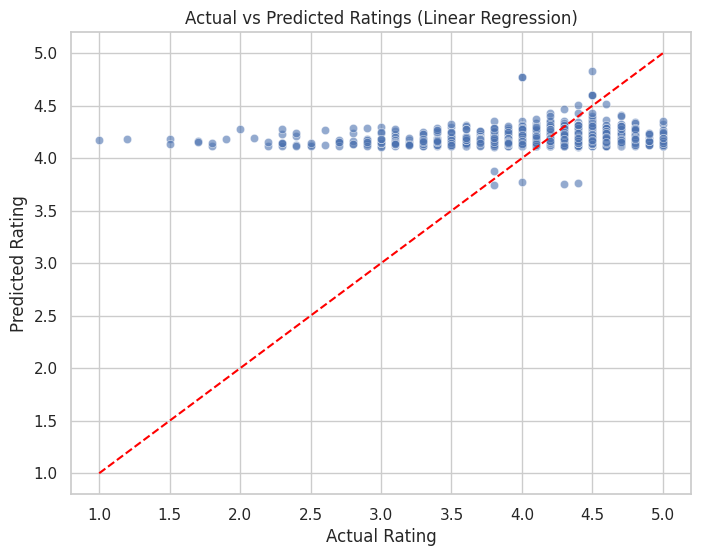

In [ ]:
#  Prepare features & encode categoricals
df_reg = df_cleaned.copy()

# Encode 'Type', 'Content Rating', 'Category'
for col in ['Type', 'Content Rating', 'Category']:
    df_reg[col] = LabelEncoder().fit_transform(df_reg[col])

# Features and target
features = ['Reviews', 'Size', 'Price', 'Installs', 'Type', 'Content Rating', 'Category']
target = 'Rating'

X = df_reg[features]
y = df_reg[target]

# Split data -
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#  Predictions & Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

#  Plot Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings (Linear Regression)")
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # ideal line
plt.grid(True)
plt.show()